### Name : Amjad Ali 
#### CMS: 023-19-0131
#### Machine Learning Assignment 05

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
#Downloading Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [21]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [22]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Define a CNN with four Convolution Layers (16, 32, 64, 128) with kernal size 3.  (10 points)

In [ ]:
classifier = Sequential()

#Prepare the data to be fed to the model, use original images size, that is 32 x 32 
classifier.add(Conv2D(16, (3, 3), activation="relu", input_shape=(32, 32, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(128, (3, 3), activation="relu", padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

#Apply appropriate activation function at the last layer (10 points)
classifier.add(Dense(10, activation='softmax'))

### compile the model

In [ ]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 64)        

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

### train it on 50 epochs using training images sparing 10% images for validation (5 points)

In [ ]:
r = classifier.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 9s 5ms/step - loss: 1.5883 - accuracy: 0.4202 - val_loss: 1.2991 - val_accuracy: 0.5278
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2471 - accuracy: 0.5548 - val_loss: 1.3018 - val_accuracy: 0.5330
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0983 - accuracy: 0.6119 - val_loss: 1.0649 - val_accuracy: 0.6330
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9992 - accuracy: 0.6464 - val_loss: 1.0070 - val_accuracy: 0.6518
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9228 - accuracy: 0.6762 - val_loss: 0.9319 - val_accuracy: 0.6812
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8549 - accuracy: 0.6986 - val_loss: 0.9384 - val_accuracy: 0.6802
Epoch 7/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.7962 - accuracy: 0.7206 - val_loss: 0.9288 - val_accuracy:

### plot accuracy graph for training and validation (5 points)

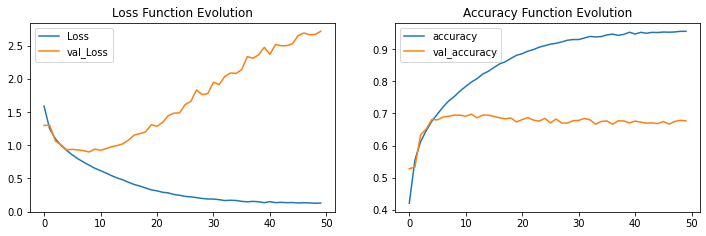

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [ ]:
evaluation = classifier.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 2.7839 - accuracy: 0.6607
Test Accuracy : 66.07%


### if model overfits, retrain on the revised number of epochs to overcome overfitting (10 points)

In [ ]:
r = classifier.fit(X_train, y_train, epochs=8, validation_split=0.1)

Epoch 1/8
1407/1407 [==============================] - 12s 8ms/step - loss: 0.1082 - accuracy: 0.9659 - val_loss: 3.1555 - val_accuracy: 0.6718
Epoch 2/8
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1148 - accuracy: 0.9628 - val_loss: 3.2052 - val_accuracy: 0.6812
Epoch 3/8
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1049 - accuracy: 0.9656 - val_loss: 3.4389 - val_accuracy: 0.6694
Epoch 4/8
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1057 - accuracy: 0.9649 - val_loss: 3.3774 - val_accuracy: 0.6666
Epoch 5/8
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1019 - accuracy: 0.9670 - val_loss: 3.3729 - val_accuracy: 0.6652
Epoch 6/8
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1028 - accuracy: 0.9680 - val_loss: 3.4726 - val_accuracy: 0.6666
Epoch 7/8
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1041 - accuracy: 0.9661 - val_loss: 3.5056 - val_accuracy: 0.658

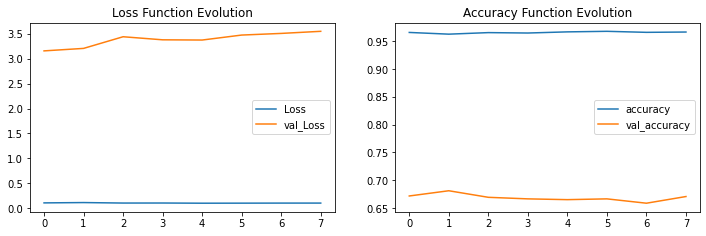

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

### evaluate model on the test dataset and report test accuracy (5 points)

In [ ]:
evaluation = classifier.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 3.6157 - accuracy: 0.6558
Test Accuracy : 65.58%


### Data Augmentations

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2)

In [ ]:
datagen.fit(X_train)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
r = classifier.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3602 - accuracy: 0.1145 - val_loss: 2.2728 - val_accuracy: 0.1100
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 2.2172 - accuracy: 0.1718 - val_loss: 2.1543 - val_accuracy: 0.2144
Epoch 3/50
1407/1407 [==============================] - 6s 5ms/step - loss: 2.0496 - accuracy: 0.2602 - val_loss: 1.9709 - val_accuracy: 0.3034
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9393 - accuracy: 0.3020 - val_loss: 1.9694 - val_accuracy: 0.3058
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8523 - accuracy: 0.3326 - val_loss: 1.8289 - val_accuracy: 0.3338
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7953 - accuracy: 0.3483 - val_loss: 1.7793 - val_accuracy: 0.3580
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7478 - accuracy: 0.3647 - val_loss: 1.7077 - val_accuracy:

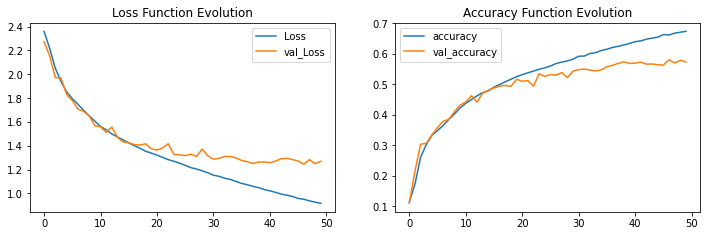

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [ ]:
evaluation = classifier.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 1.3311 - accuracy: 0.5573
Test Accuracy : 55.73%


#### perform augmentation with at least five augmentation attributes (e.g. zoom, flip etc.) 

In [ ]:
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)
datagen.fit(X_train)

In [ ]:
r = classifier.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9057 - accuracy: 0.6786 - val_loss: 1.3187 - val_accuracy: 0.5668
Epoch 2/50
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9015 - accuracy: 0.6784 - val_loss: 1.2672 - val_accuracy: 0.5772
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8847 - accuracy: 0.6880 - val_loss: 1.2708 - val_accuracy: 0.5806
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8783 - accuracy: 0.6868 - val_loss: 1.2483 - val_accuracy: 0.5842
Epoch 5/50
1407/1407 [==============================] - 6s 5ms/step - loss: 0.8652 - accuracy: 0.6938 - val_loss: 1.2687 - val_accuracy: 0.5852
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8544 - accuracy: 0.6964 - val_loss: 1.3316 - val_accuracy: 0.5698
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8472 - accuracy: 0.6994 - val_loss: 1.3030 - val_accuracy:

### Finally, use VGG-16 to leverage the power of pretrained networks by using both feature extraction as well as fine tuning methods

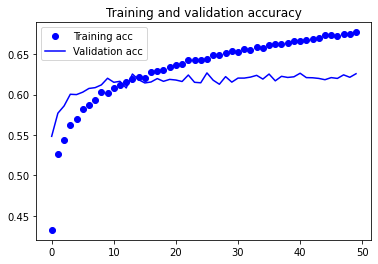

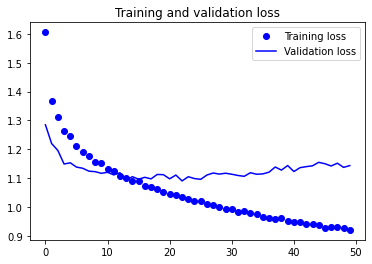

In [32]:
import matplotlib.pyplot as plt

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
from keras.applications import VGG16

vgg16_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [45]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

#### Feature extraction

In [46]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg16_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [42]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
train_features = np.reshape(X_train, (50000, 32 * 32 * 3))

In [48]:
from keras import models
from keras import layers

classifier = models.Sequential()
classifier.add(vgg16_model)
classifier.add(layers.Flatten())
classifier.add(layers.Dense(256, activation='relu'))
classifier.add(layers.Dense(10, activation='softmax'))

In [49]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [51]:
vgg16_model.trainable = False

In [52]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [53]:
r = classifier.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3538 - accuracy: 0.5250 - val_loss: 1.1991 - val_accuracy: 0.5708
Epoch 2/50
1407/1407 [==============================] - 15s 11ms/step - loss: 1.1769 - accuracy: 0.5887 - val_loss: 1.1551 - val_accuracy: 0.5976
Epoch 3/50
1407/1407 [==============================] - 15s 11ms/step - loss: 1.1104 - accuracy: 0.6118 - val_loss: 1.1190 - val_accuracy: 0.6116
Epoch 4/50
1407/1407 [==============================] - 15s 11ms/step - loss: 1.0624 - accuracy: 0.6295 - val_loss: 1.1029 - val_accuracy: 0.6130
Epoch 5/50
1407/1407 [==============================] - 16s 11ms/step - loss: 1.0185 - accuracy: 0.6423 - val_loss: 1.0791 - val_accuracy: 0.6240
Epoch 6/50
1407/1407 [==============================] - 16s 11ms/step - loss: 0.9810 - accuracy: 0.6558 - val_loss: 1.0907 - val_accuracy: 0.6272
Epoch 7/50
1407/1407 [==============================] - 15s 10ms/step - loss: 0.9414 - accuracy: 0.6702 - val_loss: 1.0982 -

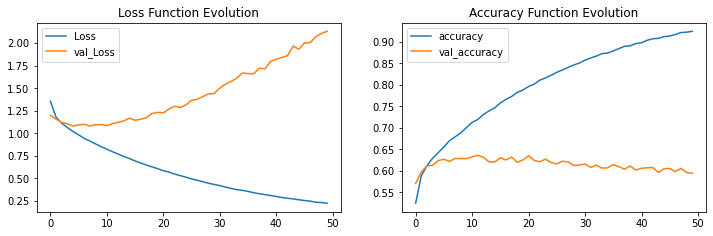

In [57]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

#### Fine Tuning

In [54]:
vgg16_model.trainable = True

set_trainable = False
for layer in vgg16_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [55]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [56]:
r = classifier.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 27s 18ms/step - loss: 2.7280 - accuracy: 0.1021 - val_loss: 2.3052 - val_accuracy: 0.1038
Epoch 2/50
1407/1407 [==============================] - 25s 18ms/step - loss: 2.3046 - accuracy: 0.0984 - val_loss: 2.3048 - val_accuracy: 0.0950
Epoch 3/50
1407/1407 [==============================] - 23s 17ms/step - loss: 2.3047 - accuracy: 0.0990 - val_loss: 2.3050 - val_accuracy: 0.0976
Epoch 4/50
1407/1407 [==============================] - 23s 17ms/step - loss: 2.3048 - accuracy: 0.1007 - val_loss: 2.3036 - val_accuracy: 0.0976
Epoch 5/50
1407/1407 [==============================] - 25s 17ms/step - loss: 2.3048 - accuracy: 0.0976 - val_loss: 2.3062 - val_accuracy: 0.0976
Epoch 6/50
1407/1407 [==============================] - 24s 17ms/step - loss: 2.3042 - accuracy: 0.1004 - val_loss: 2.3048 - val_accuracy: 0.1024
Epoch 7/50
1407/1407 [==============================] - 23s 17ms/step - loss: 2.3044 - accuracy: 0.0994 - val_loss: 2.3035 -

KeyboardInterrupt: ignored

### Write a final paragraph to explain your results in a tabular format